# Задача 1. Разведочный анализ
- [x] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- [x] Считать данные и вывести их основные характеристики, описание признаков.
- [x] Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- [x] (+2 балла) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- [x] Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- [x] (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- [x] (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('World University Rankings 2023.csv')

## EDA

Был выбран [датасет](https://www.kaggle.com/datasets/alitaqi000/world-university-rankings-2023), содержащий информацию о рейтинге университетов 2023 года.

Признаки:


*   Ранг университета
*   Название университета
*   Месторасположение
*   Количество студентов
*   Количество студентов на персонал
*   Процентное количество иностранных студентов
*   Соотношение мужчин к женщинам
*   Общий балл
*   Оценка преподавания
*   Оценка исследований
*   Оценка цитирования
*   Оценка дохода в отрасли
*   Оценка международных перспектив

Предлагается решить задачу регрессии, определив ранг университета.

In [60]:
df.head()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


In [61]:
df.describe()

,No of student per staff,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
count,2208.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,19.000408,27.018010,23.016898,48.495887,47.104558,46.880378
std,12.132224,13.282243,16.763819,27.967185,15.093682,22.582401
min,0.400000,11.600000,7.400000,0.800000,36.900000,14.100000
25%,12.600000,18.000000,11.300000,23.100000,37.800000,27.900000
50%,16.600000,22.700000,17.000000,47.200000,40.500000,42.100000
75%,22.200000,31.850000,28.900000,72.350000,48.300000,62.100000
max,232.200000,94.800000,99.700000,100.000000,100.000000,99.700000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   University Rank              2341 non-null   object 
 1   Name of University           2233 non-null   object 
 2   Location                     2047 non-null   object 
 3   No of student                2209 non-null   object 
 4   No of student per staff      2208 non-null   float64
 5   International Student        2209 non-null   object 
 6   Female:Male Ratio            2128 non-null   object 
 7   OverAll Score                1799 non-null   object 
 8   Teaching Score               1799 non-null   float64
 9   Research Score               1799 non-null   float64
 10  Citations Score              1799 non-null   float64
 11  Industry Income Score        1799 non-null   float64
 12  International Outlook Score  1799 non-null   float64
dtypes: float64(6), obj

In [63]:
df['OverAll Score'].unique()

array(['96.4', '95.2', '94.8', '94.2', '94.1', '92.4', '92.1', '91.4',
       '90.4', '89.4', '88.9', '88.8', '88.3', '88.2', '88.1', '87.4',
       '87.1', '85.9', '85.8', '85.7', '82.9', '82.7', '82.6', '82.1',
       '81.1', '79.8', '79.3', '78.5', '78.1', '77.7', '77.6', '77.1',
       '77.0', '76.5', '76.0', '75.9', '75.7', '75.4', '74.6', '74.1',
       '73.6', '73.2', '73.0', '72.9', '72.7', '72.4', '72.3', '72.0',
       '71.2', '71.1', '70.9', '70.8', '70.6', '70.5', '70.3', '69.6',
       '69.3', '69.0', '68.5', '68.4', '68.3', '68.2', '68.1', '68.0',
       '67.8', '67.7', '67.5', '67.2', '67.1', '66.6', '66.5', '66.4',
       '66.3', '65.8', '65.7', '65.5', '65.3', '65.1', '64.9', '64.7',
       '64.6', '64.5', '64.2', '63.9', '63.7', '63.6', '63.5', '63.4',
       '63.0', '62.9', '62.8', '62.7', '62.6', '62.5', '62.3', '62.2',
       '61.9', '61.7', '61.2', '61.1', '61.0', '60.9', '60.8', '60.7',
       '60.4', '60.2', '60.1', '59.8', '59.6', '59.4', '59.3', '59.0',
      

### Feature engineering

Необходимо выполнить преобразование типов:
 * Ранг универстита должен быть типа int (сейчас object)
 * Количество студентов должно быть типа float64 (сейчас object)
 * Количество иностранных студентов должно быть типа float (сейчас object)
 * Процентное отношение женщин к мужчинам можно разбить на два столбца --- процентное количество женщин и процентное количество мужчин

Значения представляющие собой диапазон в столбце OverAll Score можно заменить средним арифметическим верхней и нижней оценок

In [64]:
df['No of student'] = df['No of student'].str.replace(',', '.').astype(float)

In [65]:
df['International Student'] = df['International Student'].str.rstrip('%')
df['International Student'] = df['International Student'].apply(lambda x: x if x != '' else np.nan)
df['International Student'] = df['International Student'].astype(float)

In [66]:
df['International Student']

0       42.0
1       25.0
2       39.0
3       24.0
4       33.0
        ... 
2336     NaN
2337     NaN
2338     NaN
2339     NaN
2340     NaN
Name: International Student, Length: 2341, dtype: float64

In [67]:
df[['Female Ratio', 'Male Ratio']] = df['Female:Male Ratio'].str.split(' : ', expand=True)

df['Female Ratio'] = df['Female Ratio'].astype(float)
df['Male Ratio'] = df['Male Ratio'].astype(float)

df.drop('Female:Male Ratio', axis=1, inplace=True)


In [68]:
def split_remove(value):
    if isinstance(value, str):
        if '–' in value:
            range_values = value.split('–')
            value = (float(range_values[0]) + float(range_values[1])) / 2
        return value

df['OverAll Score'] = df['OverAll Score'].apply(split_remove).astype(float)

In [69]:
df['University Rank'].unique()

array(['1', '2', '3', '5', '6', '7', '8', '9', '10', '11', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '85',
       '86', '88', '89', '90', '91', '93', '94', '95', '98', '99', '101',
       '104', '106', '107', '108', '110', '111', '112', '113', '114',
       '117', '118', '119', '121', '122', '123', '124', '126', '127',
       '128', '130', '131', '133', '134', '135', '136', '137', '139',
       '144', '145', '146', '147', '148', '151', '154', '155', '156',
       '160', '161', '163', '166', '168', '170', '173', '174', '175',
       '176', '179', '180', '181', '182', '183', '185', '186', '187

In [70]:
def to_float(value):
    try:
        value = float(value)
    except:
        value = float(1501)
    finally:
        return value

df['University Rank'] = df['University Rank'].apply(split_remove).apply(to_float).astype(float)

In [71]:
df['University Rank'].unique()

array([1.0000e+00, 2.0000e+00, 3.0000e+00, 5.0000e+00, 6.0000e+00,
       7.0000e+00, 8.0000e+00, 9.0000e+00, 1.0000e+01, 1.1000e+01,
       1.3000e+01, 1.4000e+01, 1.5000e+01, 1.6000e+01, 1.7000e+01,
       1.8000e+01, 1.9000e+01, 2.0000e+01, 2.1000e+01, 2.2000e+01,
       2.3000e+01, 2.4000e+01, 2.5000e+01, 2.6000e+01, 2.8000e+01,
       2.9000e+01, 3.0000e+01, 3.1000e+01, 3.2000e+01, 3.3000e+01,
       3.4000e+01, 3.5000e+01, 3.6000e+01, 3.7000e+01, 3.8000e+01,
       3.9000e+01, 4.0000e+01, 4.1000e+01, 4.2000e+01, 4.3000e+01,
       4.4000e+01, 4.5000e+01, 4.6000e+01, 4.7000e+01, 4.8000e+01,
       4.9000e+01, 5.0000e+01, 5.1000e+01, 5.2000e+01, 5.3000e+01,
       5.4000e+01, 5.6000e+01, 5.7000e+01, 5.8000e+01, 5.9000e+01,
       6.0000e+01, 6.1000e+01, 6.2000e+01, 6.3000e+01, 6.4000e+01,
       6.5000e+01, 6.6000e+01, 6.7000e+01, 6.8000e+01, 6.9000e+01,
       7.0000e+01, 7.1000e+01, 7.3000e+01, 7.4000e+01, 7.5000e+01,
       7.6000e+01, 7.7000e+01, 7.8000e+01, 7.9000e+01, 8.0000e

In [72]:
df.head()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female Ratio,Male Ratio
0,1.0,University of Oxford,United Kingdom,20.965,10.6,42.0,96.4,92.3,99.7,99.0,74.9,96.2,48.0,52.0
1,2.0,Harvard University,United States,21.887,9.6,25.0,95.2,94.8,99.0,99.3,49.5,80.5,50.0,50.0
2,3.0,University of Cambridge,United Kingdom,20.185,11.3,39.0,94.8,90.9,99.5,97.0,54.2,95.8,47.0,53.0
3,3.0,Stanford University,United States,16.164,7.1,24.0,94.8,94.2,96.7,99.8,65.0,79.8,46.0,54.0
4,5.0,Massachusetts Institute of Technology,United States,11.415,8.2,33.0,94.2,90.7,93.6,99.8,90.9,89.3,40.0,60.0


In [73]:
df.describe()

,University Rank,No of student,No of student per staff,International Student,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female Ratio,Male Ratio
count,2341.000000,2209.000000,2208.000000,2206.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,2128.000000,2128.000000
mean,1035.192866,32.674966,19.000408,10.126473,34.165870,27.018010,23.016898,48.495887,47.104558,46.880378,50.843045,49.156955
std,500.393502,96.166240,12.132224,13.414442,16.162911,13.282243,16.763819,27.967185,15.093682,22.582401,13.654401,13.654401
min,1.000000,1.015000,0.400000,0.000000,14.350000,11.600000,7.400000,0.800000,36.900000,14.100000,2.000000,0.000000
25%,550.500000,7.351000,12.600000,1.000000,21.350000,18.000000,11.300000,23.100000,37.800000,27.900000,43.750000,41.000000
50%,1350.500000,15.109000,16.600000,5.000000,31.850000,22.700000,17.000000,47.200000,40.500000,42.100000,53.000000,47.000000
75%,1501.000000,27.353000,22.200000,14.000000,43.500000,31.850000,28.900000,72.350000,48.300000,62.100000,59.000000,56.250000
max,1501.000000,995.000000,232.200000,100.000000,96.400000,94.800000,99.700000,100.000000,100.000000,99.700000,100.000000,98.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   University Rank              2341 non-null   float64
 1   Name of University           2233 non-null   object 
 2   Location                     2047 non-null   object 
 3   No of student                2209 non-null   float64
 4   No of student per staff      2208 non-null   float64
 5   International Student        2206 non-null   float64
 6   OverAll Score                1799 non-null   float64
 7   Teaching Score               1799 non-null   float64
 8   Research Score               1799 non-null   float64
 9   Citations Score              1799 non-null   float64
 10  Industry Income Score        1799 non-null   float64
 11  International Outlook Score  1799 non-null   float64
 12  Female Ratio                 2128 non-null   float64
 13  Male Ratio        

### Data cleaning

В датасете много пропущенных значений, постепенно заполним их, но перед этим удалим все строки, в которых отсутствуют какие-либо данные.

In [75]:
df = df.dropna(how='all')

Так как по известным месторасположениям нельзя выдвинуть предположений о неизвестных, то заполним пропущенные значения 'Unknown location', но можно попробовать восстановить локацию по названию университета.

In [76]:
countries = ['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia, Plurinational State of', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo, The Democratic Republic of the', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See (Vatican City State)', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', "Korea, Democratic People's Republic of", 'Korea, Republic of', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia, Republic of', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Federated States of', 'Moldova, Republic of', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestinian Territory, Occupied', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Réunion', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'South Sudan', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan, Province of China', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'United States Minor Outlying Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, Bolivarian Republic of', 'Viet Nam', 'Virgin Islands, British', 'Virgin Islands, U.S.', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe']
ban_words = ["university", "of", "national", "technical", "west"]

from geopy.geocoders import Nominatim

def try_get_country(row):
    if pd.isnull(row['Location']) and not pd.isnull(row['Name of University']):
        words_in_name = list(map(lambda x : x.lower(), row['Name of University'].split()))
        country = None
        for word in words_in_name:
            if word in countries:
                country = word
                break
        if country is None:
            for word in words_in_name:
                if word not in ban_words and get_country(word) is not None:
                    country = get_country(word)
                    break
        return country
    elif pd.isnull(row['Location']):
        return "Unknown location"
    else:
        return row['Location']

def get_country(city):
    geolocator = Nominatim(user_agent="AlimovPavel")
    try:
        location = geolocator.geocode(city, language='en')
        country = location.address.split(',')[-1]
        return country.strip()
    except:
        print(f"City {city} not found")
        return "Unknown location"

df['Location'] = df.apply(try_get_country, axis=1)
df[df['Location'].isnull()]

City radboud not found


,University Rank,Name of University,Location,No of student,No of student per staff,International Student,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female Ratio,Male Ratio


In [91]:
# Также используем one hot кодирование для столбца Location (feature engineering)
# Но он пригодится для дальнейшего анализа, а решать задачу регрессии в данном задании не нужно
# Поэтому оставим строчку закомментированной

# df = pd.get_dummies(df, drop_first=True)

Название университета не представляет интереса, т.к. это уникальный идентификатор.

In [77]:
df = df.drop(columns=['Name of University'])

Попробуем отследить зависимость оставшихся незаполненным аттрибутов от страны, в которой располагается университет

array([[<Axes: title={'center': 'No of student'}>,
        <Axes: title={'center': 'No of student per staff'}>,
        <Axes: title={'center': 'International Student'}>,
        <Axes: title={'center': 'OverAll Score'}>,
        <Axes: title={'center': 'Teaching Score'}>],
       [<Axes: title={'center': 'Research Score'}>,
        <Axes: title={'center': 'Citations Score'}>,
        <Axes: title={'center': 'Industry Income Score'}>,
        <Axes: title={'center': 'International Outlook Score'}>,
        <Axes: title={'center': 'Female Ratio'}>]], dtype=object)

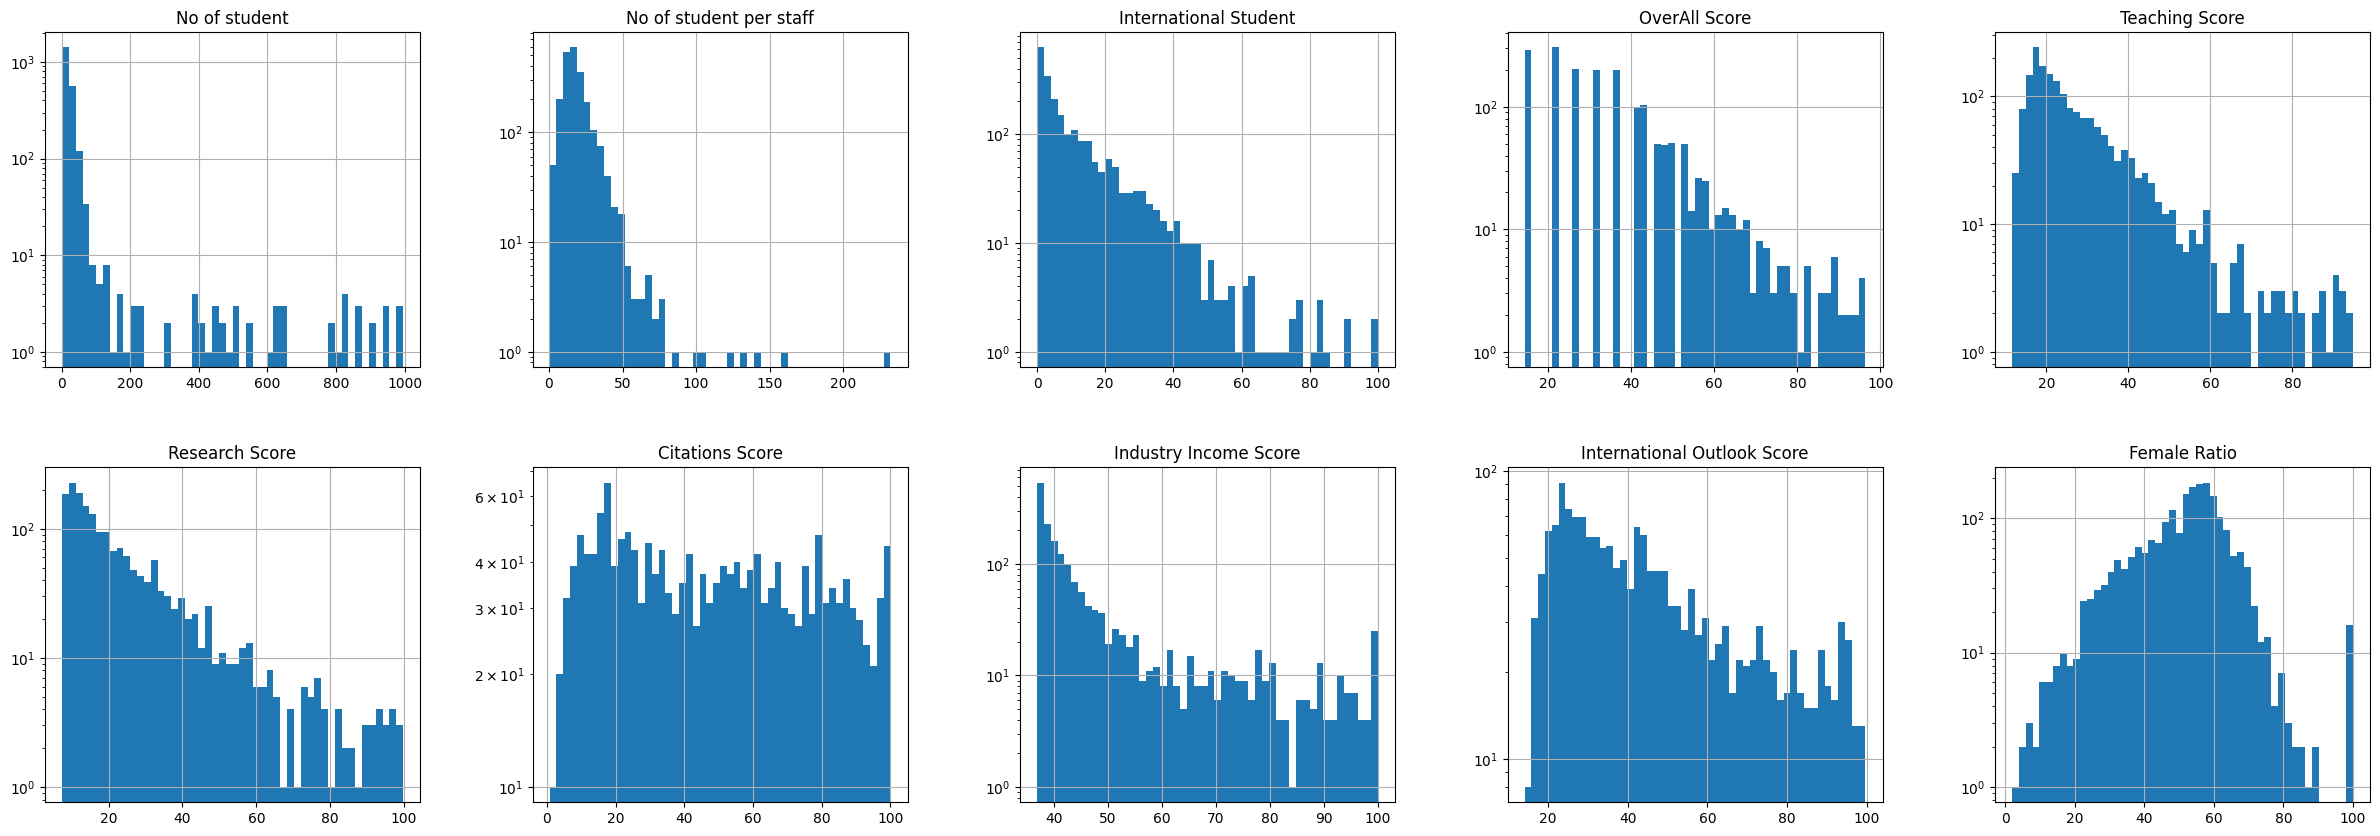

In [78]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30,10))
df.drop(columns=["Location", 'Male Ratio', "University Rank"]).hist(ax=axes, bins=50, log=True)

Во всех столбцах нет ярко выраженного распределения, поэтому логичнее всего заполнить недостающие значения в различных оценках и количестве студентов на персонал медианным значением известных соответствующих столбцов.

In [79]:
columns = [
    'No of student per staff',
    'Teaching Score',
    'Research Score',
    'Citations Score',
    'Industry Income Score',
    'International Outlook Score',
    'No of student',
    'International Student',
    'Female Ratio',
    'Male Ratio',
    'OverAll Score'
]
df[columns] = df[columns].fillna(df[columns].median())

In [80]:
df.isna().sum()

University Rank                  0
Location                         0
No of student                    0
No of student per staff          0
International Student            0
OverAll Score                    0
Teaching Score                   0
Research Score                   0
Citations Score                  0
Industry Income Score            0
International Outlook Score      0
Female Ratio                     0
Male Ratio                     213
dtype: int64

### Анализ признаков

Построим матрицу корреляции численных атрибутов. Из неё видно, что сильная корреляция у оценок (что логично, т.к. если университет хорошо показывает себя в одной сфере, то и в других скорее всего тоже будут хорошие результаты) и максимальная корреляция у процентного количества мужчин и женщин в университете, что обуславливается построением этих столбцов (в сумме значения дают 100, т.е. по одному столбцу однозначно определяется другой), значит можно один из них убрать.

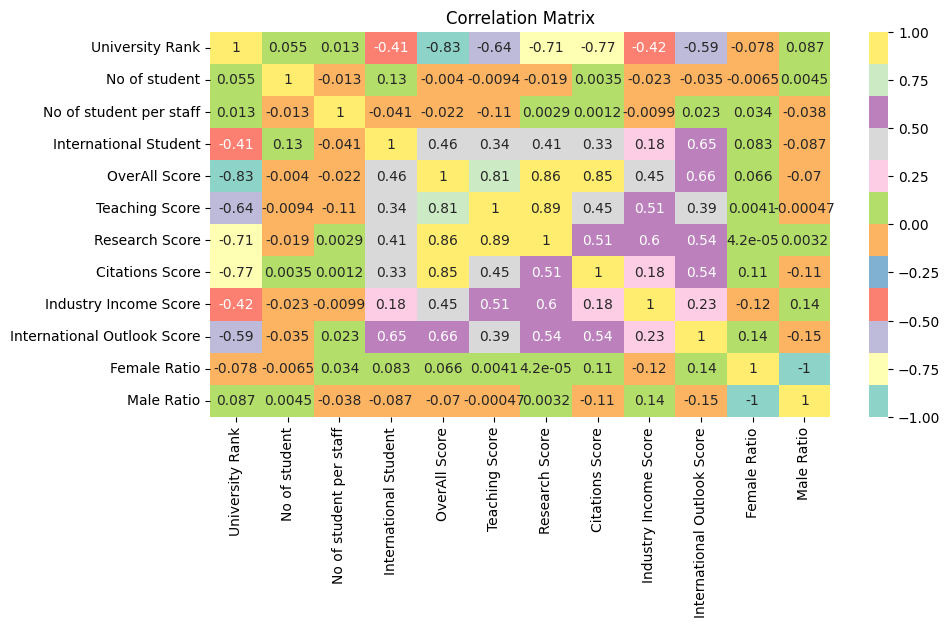

In [81]:
df_corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 5))
sns.heatmap(df_corr, annot=True, cmap="Set3")
plt.title("Correlation Matrix")
plt.show()

In [82]:
full_df = df.copy()
target = df['University Rank']
df = df.drop(columns=['University Rank', 'Male Ratio'])

In [83]:
!pip install countryinfo

In [84]:
from countryinfo import CountryInfo
from collections import defaultdict

continents = defaultdict(int)

for row in df["Location"]:
    try:
        country = CountryInfo(row)
        continent = country.region()
        continents[continent] += 1
    except:
        continents["Unknown continent"] += 1

In [85]:
df_for_analysis = full_df.copy()

def groupby_rank(value):
    if 1 <= value <= 250:
        return "1-250"
    if 251 <= value <= 500:
        return "251-500"
    if 501 <= value <= 1000:
        return "501-1000"
    if 1001 <= value:
        return "1000+"

def groupby_location(value):
    try:
        country = CountryInfo(value)
        continent = country.region()
    except:
        continent = "Unknown continent"
    return continent

df_for_analysis["University Rank"] = df_for_analysis["University Rank"].apply(groupby_rank)
df_for_analysis["Location"] = full_df["Location"].apply(groupby_location)

In [86]:
df_for_analysis["Location"].unique()

array(['Europe', 'Americas', 'Asia', 'Oceania', 'Africa',
       'Unknown continent'], dtype=object)

Рассмотрим зависимости столбцов от месторасположения (в продвинутых странах оценки должны быть выше, чем в странах третьего мира)

<Axes: xlabel='Location', ylabel='count'>

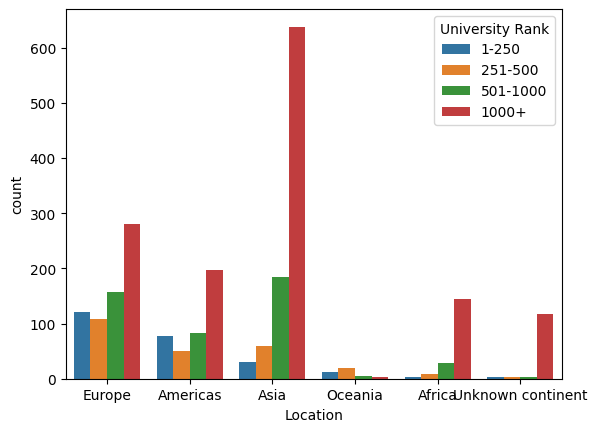

In [87]:
sns.countplot(df_for_analysis, x="Location", hue="University Rank")

Из графика выше видно, что лучшие университеты в основном расположены в Европе и Америке, в то время как худшие в основном в Азии, а про остальные 3 части света информации мало.